In [3]:
import time
import os
import pandas as pd  
import re
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np
import openpyxl
import math

In [4]:
os.chdir("/Users/ysoh/Desktop/FA팀/2024년 업무 폴더/3.맞춤형쿠션/2024 조색 샘플 측색")
pd.options.display.float_format='{:.2f}'.format
df = pd.read_csv('./240923_맞춤형파운데이션(renew)_분석용.csv', encoding='cp949')

In [5]:
df

,Unnamed: 0,#,Brand,Line,Type,Productcode,Color,L*(D65),a*(D65),b*(D65),L,C,h,r,g,b,TONE,LIGHT,ITA,Unnamed: 19
0,0,001-1,FA팀,맞춤형 파운데이션 #1MC3,cushion,1,1MC3,85.32,6.69,12.78,85.32,14.43,62.37,235.63,208.12,189.47,C3,1,70.11,very ilght
1,1,001-2,FA팀,맞춤형 파운데이션 #1MC3,cushion,1,1MC3,85.24,6.65,12.72,85.24,14.35,62.40,235.29,207.92,189.36,C3,1,70.15,very ilght
2,2,001-3,FA팀,맞춤형 파운데이션 #1MC3,cushion,1,1MC3,85.52,6.64,12.80,85.52,14.42,62.58,236.13,208.71,189.98,C3,1,70.18,very ilght
3,3,002-1,FA팀,맞춤형 파운데이션 #1MC2,cushion,2,1MC2,85.58,7.89,13.91,85.58,15.99,60.44,239.28,208.00,188.11,C2,1,68.65,very ilght
4,4,002-2,FA팀,맞춤형 파운데이션 #1MC2,cushion,2,1MC2,85.61,7.87,13.90,85.61,15.97,60.48,239.33,208.10,188.21,C2,1,68.68,very ilght
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
766,766,256-2,FA팀,맞춤형 파운데이션 #49MW2,cushion,256,49MW2,32.80,3.32,5.32,32.80,6.27,58.03,85.83,75.10,68.93,W2,49,-72.81,dark
767,767,256-3,FA팀,맞춤형 파운데이션 #49MW2,cushion,256,49MW2,32.81,3.34,5.41,32.81,6.36,58.31,85.93,75.11,68.82,W2,49,-72.53,dark
768,768,257-1,FA팀,맞춤형 파운데이션 #50MN,cushion,257,50MN,29.03,3.05,2.74,29.03,4.10,41.94,75.00,66.71,64.32,N,50,-82.56,dark
769,769,257-2,FA팀,맞춤형 파운데이션 #50MN,cushion,257,50MN,28.97,3.10,2.84,28.97,4.20,42.49,75.00,66.54,64.03,N,50,-82.31,dark


In [6]:
df.dropna(axis=0)

,Unnamed: 0,#,Brand,Line,Type,Productcode,Color,L*(D65),a*(D65),b*(D65),L,C,h,r,g,b,TONE,LIGHT,ITA,Unnamed: 19
0,0,001-1,FA팀,맞춤형 파운데이션 #1MC3,cushion,1,1MC3,85.32,6.69,12.78,85.32,14.43,62.37,235.63,208.12,189.47,C3,1,70.11,very ilght
1,1,001-2,FA팀,맞춤형 파운데이션 #1MC3,cushion,1,1MC3,85.24,6.65,12.72,85.24,14.35,62.40,235.29,207.92,189.36,C3,1,70.15,very ilght
2,2,001-3,FA팀,맞춤형 파운데이션 #1MC3,cushion,1,1MC3,85.52,6.64,12.80,85.52,14.42,62.58,236.13,208.71,189.98,C3,1,70.18,very ilght
3,3,002-1,FA팀,맞춤형 파운데이션 #1MC2,cushion,2,1MC2,85.58,7.89,13.91,85.58,15.99,60.44,239.28,208.00,188.11,C2,1,68.65,very ilght
4,4,002-2,FA팀,맞춤형 파운데이션 #1MC2,cushion,2,1MC2,85.61,7.87,13.90,85.61,15.97,60.48,239.33,208.10,188.21,C2,1,68.68,very ilght
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
766,766,256-2,FA팀,맞춤형 파운데이션 #49MW2,cushion,256,49MW2,32.80,3.32,5.32,32.80,6.27,58.03,85.83,75.10,68.93,W2,49,-72.81,dark
767,767,256-3,FA팀,맞춤형 파운데이션 #49MW2,cushion,256,49MW2,32.81,3.34,5.41,32.81,6.36,58.31,85.93,75.11,68.82,W2,49,-72.53,dark
768,768,257-1,FA팀,맞춤형 파운데이션 #50MN,cushion,257,50MN,29.03,3.05,2.74,29.03,4.10,41.94,75.00,66.71,64.32,N,50,-82.56,dark
769,769,257-2,FA팀,맞춤형 파운데이션 #50MN,cushion,257,50MN,28.97,3.10,2.84,28.97,4.20,42.49,75.00,66.54,64.03,N,50,-82.31,dark


In [7]:
a=list(7*k for k in range(12)) 
i=0
x=[]
y=[]

for b in range(a[i],a[i]+7):
  x_values= CODE2022_RGB['CODE2022'][b] #'0.0C3', '0.0C2', '0.0C1', '0.0N1', '0.0W1', '0.0W2', '0.0W3'
  x.append(x_values)
  y_values = CODE2022_RGB['R'][b] #243, 240, 239, 239...
  y.append(y_values)

  plt.plot(x,y)
  i=i+1

NameError: name 'CODE2022_RGB' is not defined

In [9]:
df2 = df.loc[ :651 ,'Unnamed: 0': 'ITA']

(45.0, 75.0)

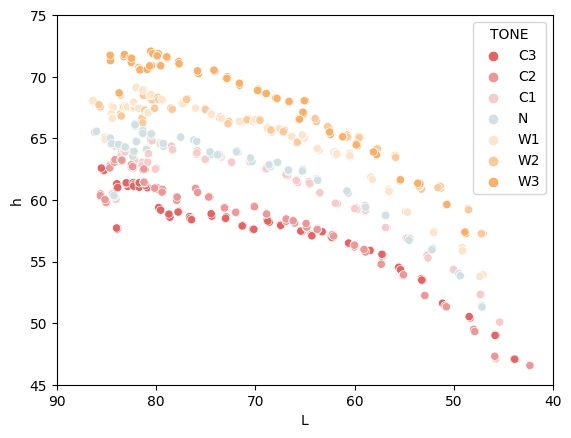

In [10]:
#(실행)24.11.13 파스텔톤
#24.11.13 산점도로 홋수, 톤 모두 나타내기
#호수: 마커의 색깔 / 톤: 마커의 모양


sns.scatterplot(x=df2['L'], y=df2['h'], data=df2, hue='TONE',
                palette=dict(C3='#e06666', C2='#ea9999', C1='#f4cccc', N='#d0e0e3',W3='#f6b26b', W2='#f9cb9c', W1='#fce5cd'))

plt.xlim(90, 40)
plt.ylim(45, 75)

In [18]:
#1~10 (NEUTRAL)
df_1to10=df[0:105]
df_1to10

,#,Brand,Line,Type,Productcode,Color,L*(D65),a*(D65),b*(D65),L,C,h,r,g,b
0,001-1,FA팀,맞춤형 파운데이션 #1MC3,cushion,1.00,1MC3,85.32,6.69,12.78,85.32,14.43,62.37,235.63,208.12,189.47
1,001-2,FA팀,맞춤형 파운데이션 #1MC3,cushion,1.00,1MC3,85.24,6.65,12.72,85.24,14.35,62.40,235.29,207.92,189.36
2,001-3,FA팀,맞춤형 파운데이션 #1MC3,cushion,1.00,1MC3,85.52,6.64,12.80,85.52,14.42,62.58,236.13,208.71,189.98
3,002-1,FA팀,맞춤형 파운데이션 #1MC2,cushion,2.00,1MC2,85.58,7.89,13.91,85.58,15.99,60.44,239.28,208.00,188.11
4,002-2,FA팀,맞춤형 파운데이션 #1MC2,cushion,2.00,1MC2,85.61,7.87,13.90,85.61,15.97,60.48,239.33,208.10,188.21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,034-2,FA팀,맞춤형 파운데이션 #9MW2,cushion,34.00,9MW2,82.30,7.61,18.55,82.30,20.05,67.69,232.18,198.78,170.49
101,034-3,FA팀,맞춤형 파운데이션 #9MW2,cushion,34.00,9MW2,82.20,7.66,18.58,82.20,20.10,67.60,232.00,198.47,170.17
102,035-1,FA팀,맞춤형 파운데이션 #9MW3,cushion,35.00,9MW3,81.74,6.35,18.18,81.74,19.26,70.75,228.14,198.05,169.62
103,035-2,FA팀,맞춤형 파운데이션 #9MW3,cushion,35.00,9MW3,81.65,6.42,18.26,81.65,19.36,70.63,228.06,197.75,169.23


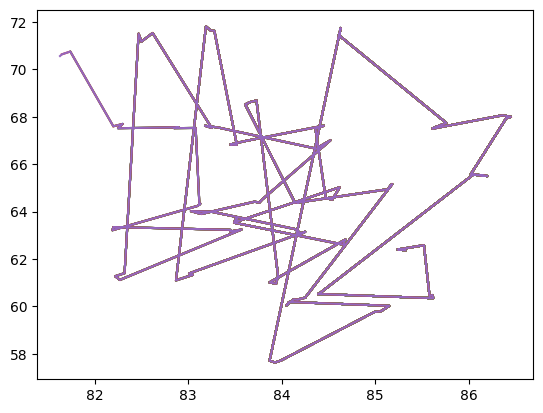

In [19]:
i=0
x=[]
y=[]

for i in range(len(df_1to10)):
  x_values= df_1to10['L'][i] #L 명도
  x.append(x_values)
  y_values = df_1to10['h'][i] #h 색상
  y.append(y_values)

  plt.plot(x,y)
  i=i+1

plt.show()

(55.0, 75.0)

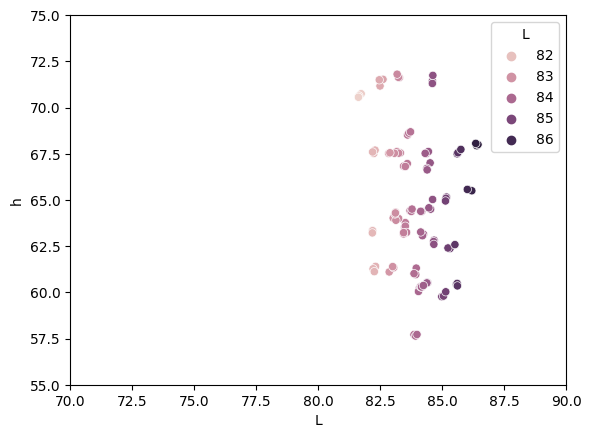

In [38]:
sns.scatterplot(x=df_1to10['L'], y=df_1to10['h'], data=df_1to10, hue=df_1to10['L'])
plt.xlim(70, 90)
plt.ylim(55, 75)

In [ ]:

홋수별 산점도


(55.0, 75.0)

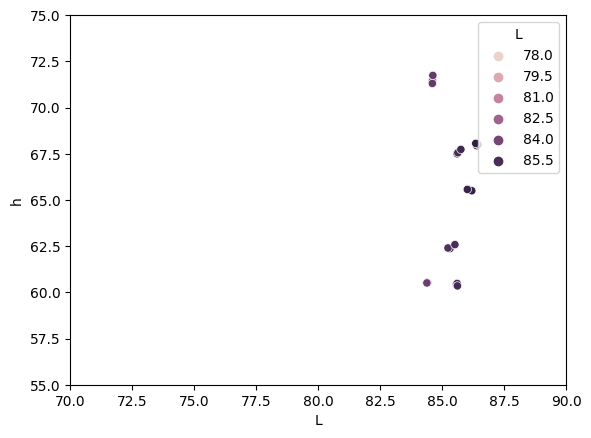

In [55]:
#1 
df_1=df[0:21]
df_1
sns.scatterplot(x=df_1['L'], y=df_1['h'], data=df_1, hue=df_1to19['L'])
plt.xlim(70, 90)
plt.ylim(55, 75)

(55.0, 75.0)

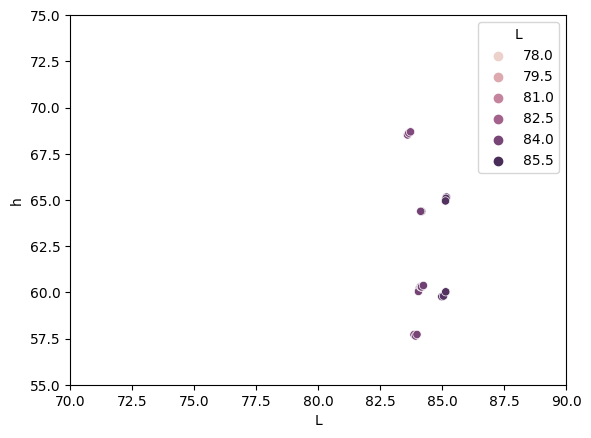

In [54]:
df_3=df[21:42]
df_3
sns.scatterplot(x=df_3['L'], y=df_3['h'], data=df_3, hue=df_1to19['L'])
plt.xlim(70, 90)
plt.ylim(55, 75)

(55.0, 75.0)

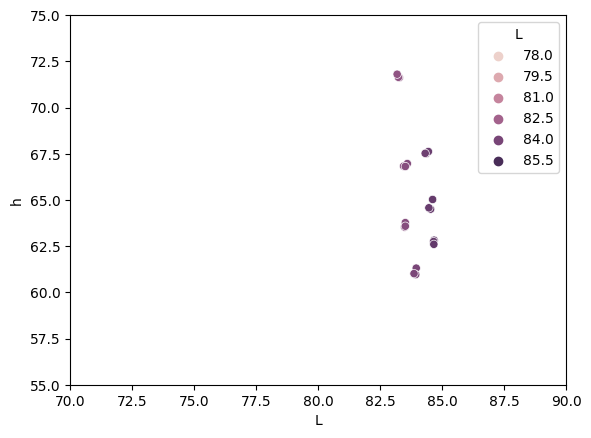

In [53]:
df_5=df[42:63]
df_5
sns.scatterplot(x=df_5['L'], y=df_5['h'], data=df_5, hue=df_1to19['L'])
plt.xlim(70, 90)
plt.ylim(55, 75)

(55.0, 75.0)

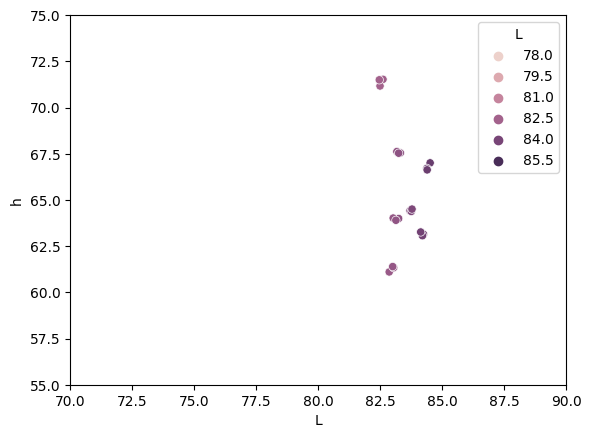

In [52]:
df_7=df[63:84]
df_7
sns.scatterplot(x=df_7['L'], y=df_7['h'], data=df_7, hue=df_1to19['L'])
plt.xlim(70, 90)
plt.ylim(55, 75)

(55.0, 75.0)

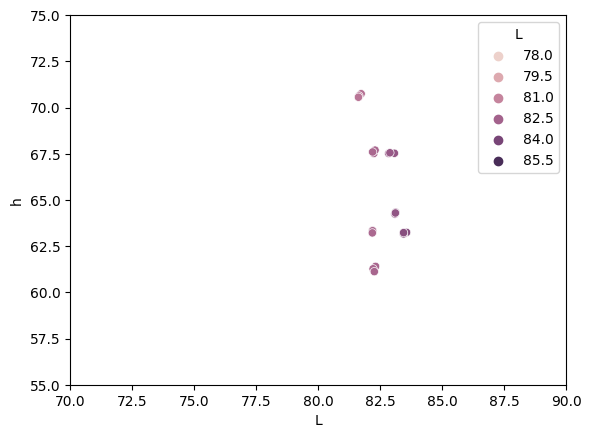

In [51]:
df_9=df[84:105]
df_9
sns.scatterplot(x=df_9['L'], y=df_9['h'], data=df_9, hue=df_1to19['L'])
plt.xlim(70, 90)
plt.ylim(55, 75)

(55.0, 75.0)

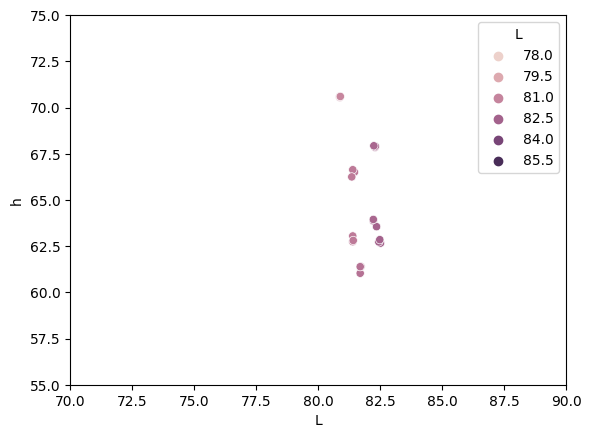

In [50]:
df_11=df[105:126]
df_11
sns.scatterplot(x=df_11['L'], y=df_11['h'], data=df_11, hue=df_1to19['L'])
plt.xlim(70, 90)
plt.ylim(55, 75)

(55.0, 75.0)

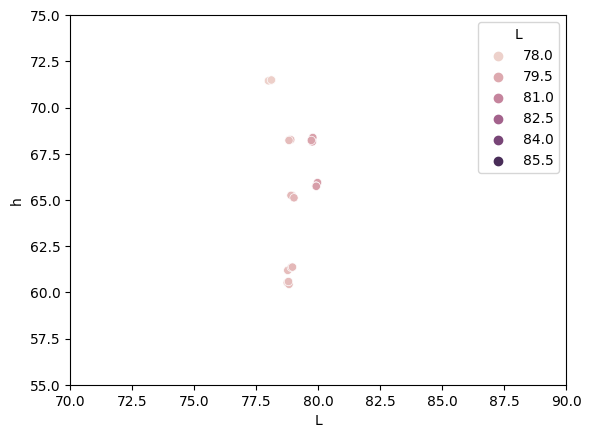

In [49]:
df_13=df[126:147]
df_13
sns.scatterplot(x=df_13['L'], y=df_13['h'], data=df_13, hue=df_1to19['L'])
plt.xlim(70, 90)
plt.ylim(55, 75)

(55.0, 75.0)

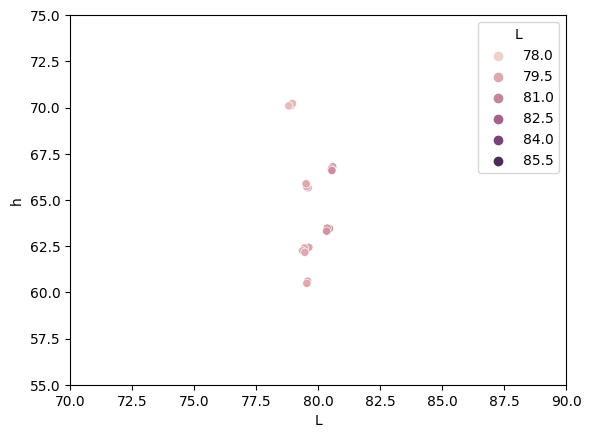

In [48]:
df_15=df[148:168]
df_15
sns.scatterplot(x=df_15['L'], y=df_15['h'], data=df_15, hue=df_1to19['L'])
plt.xlim(70, 90)
plt.ylim(55, 75)

(55.0, 75.0)

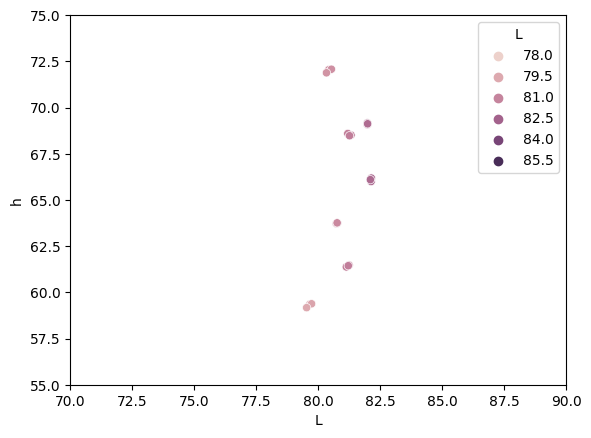

In [47]:
df_17=df[168:189]
df_17
sns.scatterplot(x=df_17['L'], y=df_17['h'], data=df_17, hue=df_1to19['L'])
plt.xlim(70, 90)
plt.ylim(55, 75)

(55.0, 75.0)

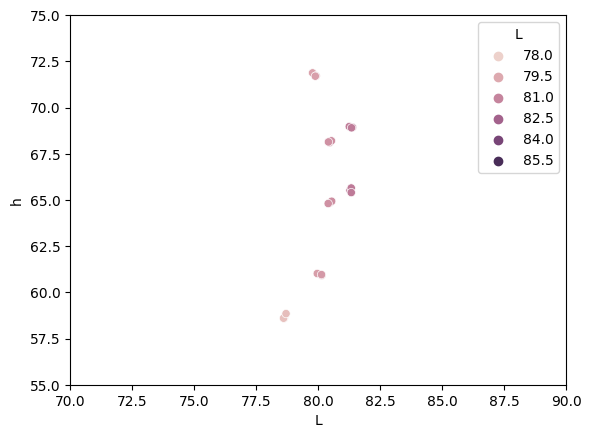

In [46]:
df_19=df[189:210]
df_19
sns.scatterplot(x=df_19['L'], y=df_19['h'], data=df_19, hue=df_1to19['L'])
plt.xlim(70, 90)
plt.ylim(55, 75)

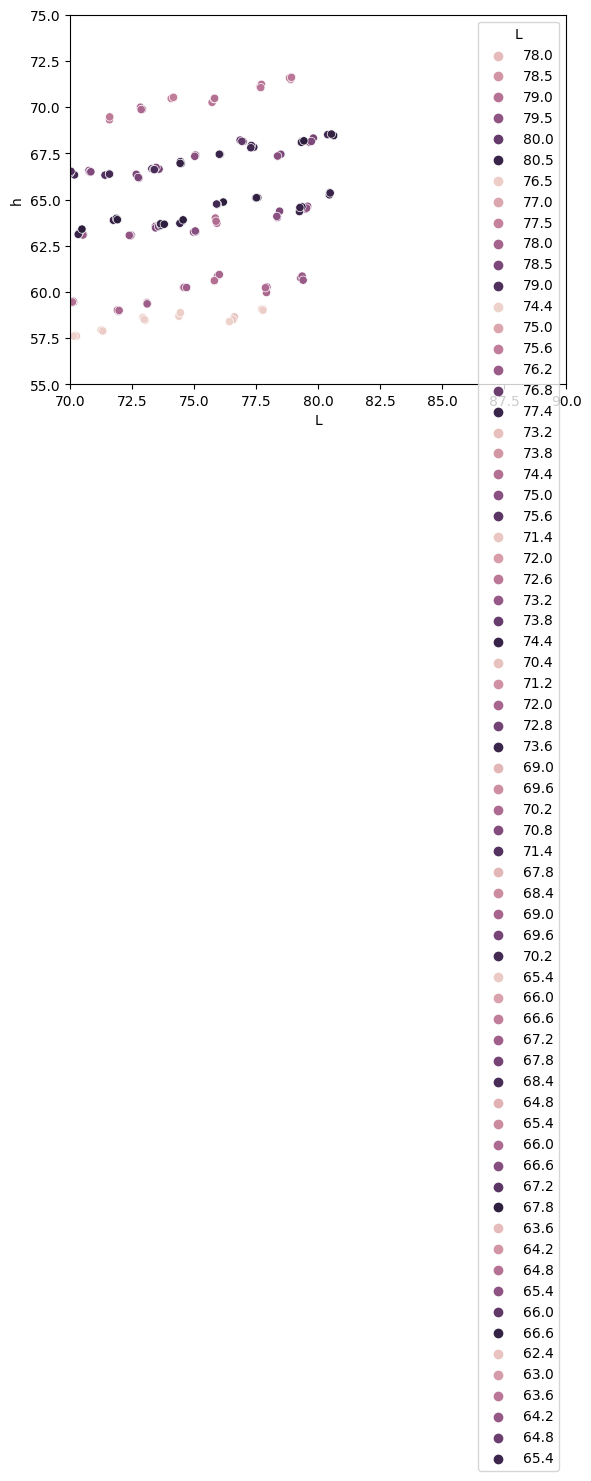

In [45]:
n=1
i=20
for i in range(20,32):
    df_i=df[(n-1)*21+210:n*21+210]
    df_i
    sns.scatterplot(x=df_i['L'], y=df_i['h'], data=df_i, hue=df_i['L'])
    plt.xlim(70, 90)
    plt.ylim(55, 75)
    i=i+1
    n=n+1

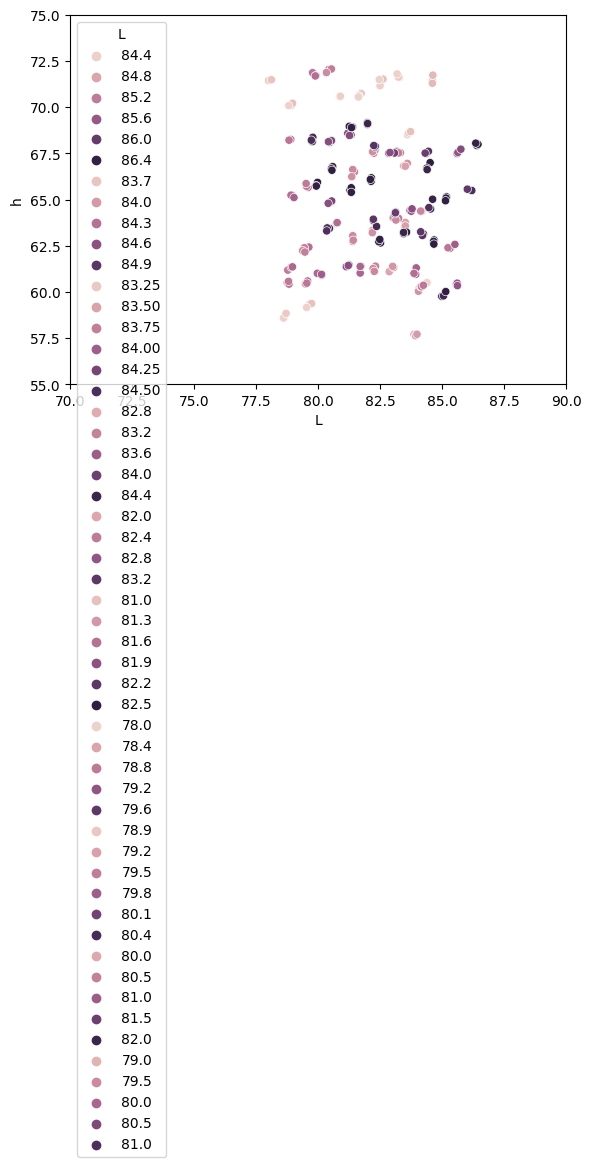

In [57]:
#1호~19호 scatter plot(수식1)
#24.08.07
n=1
i=1
for i in range(11):
    df_n=df[(i-1)*21+0:(i-1)*21+21]
    df_n
    sns.scatterplot(x=df_n['L'], y=df_n['h'], data=df_n, hue=df_n['L'])
    plt.xlim(70, 90)
    plt.ylim(55, 75)
    i=i+1
    n=n+1

(55.0, 75.0)

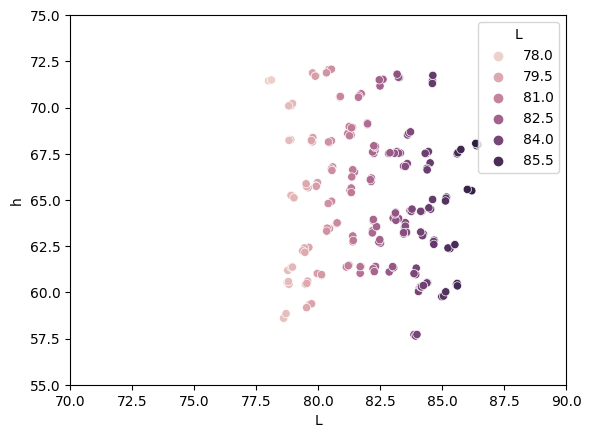

In [41]:
#1호~19호 scatter plot (수식2)
#24.08.07
df_1to19=df[0:210]
df_1to19
sns.scatterplot(x=df_1to19['L'], y=df_1to19['h'], data=df_1to19, hue=df_1to19['L'])
plt.xlim(70, 90)
plt.ylim(55, 75)

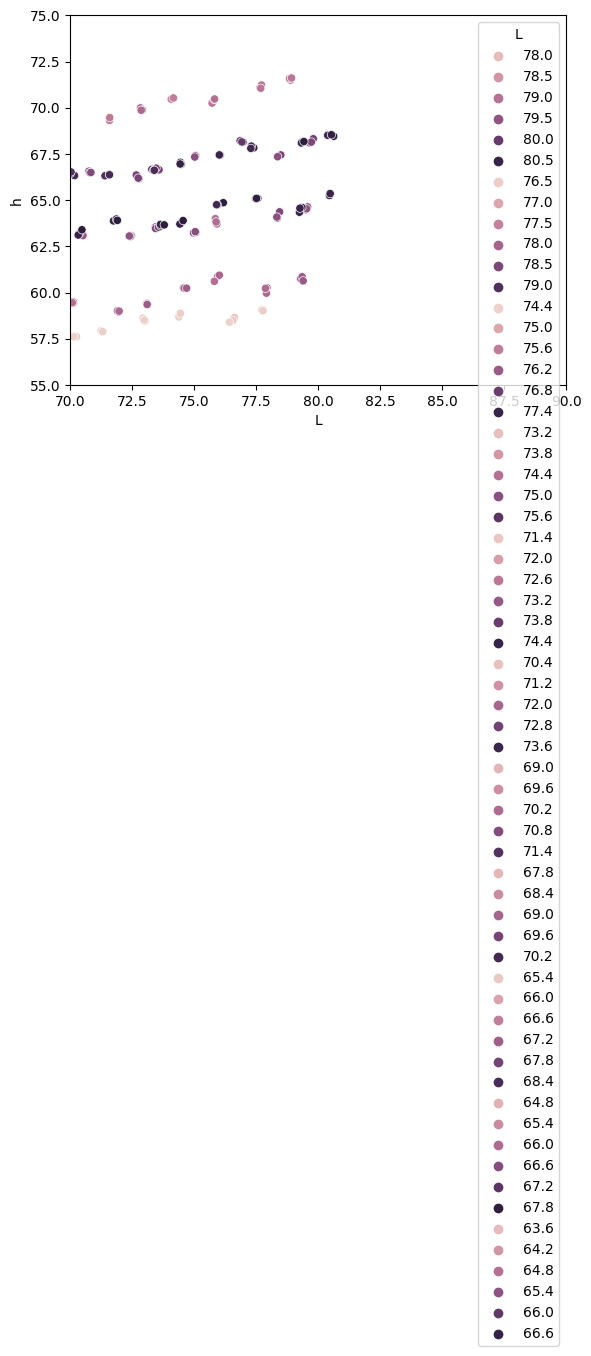

In [58]:
#20호~31호 scatter plot 
#24.08.07
n=1
i=20
for i in range(20,31):
    df_i=df[(n-1)*21+210:n*21+210]
    df_i
    sns.scatterplot(x=df_i['L'], y=df_i['h'], data=df_i, hue=df_i['L'])
    plt.xlim(70, 90)
    plt.ylim(55, 75)
    i=i+1
    n=n+1

In [ ]:

톤 별 산점도


In [7]:
#쿨톤의 h scatter plot 24.08.08

df.dropna(axis=0, inplace=True)
h_C=df[df['Color'].str.contains('C')]
h_C

,Unnamed: 0,#,Brand,Line,Type,Productcode,Color,L*(D65),a*(D65),b*(D65),L,C,h,r,g,b,TONE,LIGHT
0,0,001-1,FA팀,맞춤형 파운데이션 #1MC3,cushion,1,1MC3,85.32,6.69,12.78,85.32,14.43,62.37,235.63,208.12,189.47,C3,1
1,1,001-2,FA팀,맞춤형 파운데이션 #1MC3,cushion,1,1MC3,85.24,6.65,12.72,85.24,14.35,62.40,235.29,207.92,189.36,C3,1
2,2,001-3,FA팀,맞춤형 파운데이션 #1MC3,cushion,1,1MC3,85.52,6.64,12.80,85.52,14.42,62.58,236.13,208.71,189.98,C3,1
3,3,002-1,FA팀,맞춤형 파운데이션 #1MC2,cushion,2,1MC2,85.58,7.89,13.91,85.58,15.99,60.44,239.28,208.00,188.11,C2,1
4,4,002-2,FA팀,맞춤형 파운데이션 #1MC2,cushion,2,1MC2,85.61,7.87,13.90,85.61,15.97,60.48,239.33,208.10,188.21,C2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,751,251-2,FA팀,맞춤형 파운데이션 #48MC2,cushion,251,48MC2,33.07,8.33,7.78,33.07,11.40,43.04,95.09,72.80,65.89,C2,48
752,752,251-3,FA팀,맞춤형 파운데이션 #48MC2,cushion,251,48MC2,32.93,8.47,7.87,32.93,11.56,42.90,94.99,72.39,65.43,C2,48
759,759,254-1,FA팀,맞춤형 파운데이션 #49MC2,cushion,254,49MC2,31.44,5.62,5.26,31.44,7.70,43.10,85.96,70.71,66.00,C2,49
760,760,254-2,FA팀,맞춤형 파운데이션 #49MC2,cushion,254,49MC2,31.54,5.58,5.27,31.54,7.68,43.36,86.15,70.96,66.21,C2,49


(40.0, 80.0)

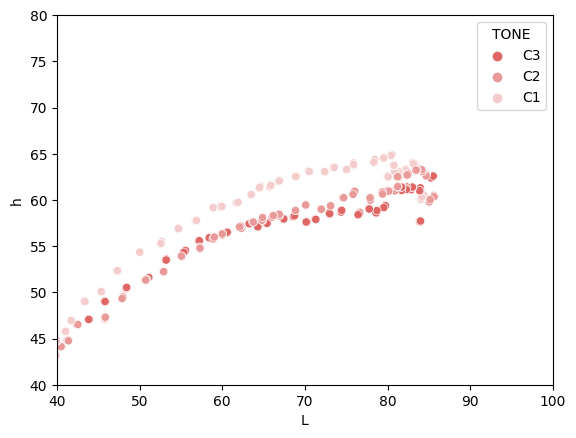

In [8]:
sns.scatterplot(x=h_C['L'], y=h_C['h'], data=h_C, hue='TONE', 
                palette=dict(C3='#e06666', C2='#ea9999', C1='#f4cccc', N='#d0e0e3',W3='#f6b26b', W2='#f9cb9c', W1='#fce5cd'))
plt.xlim(40, 100)
plt.ylim(40, 80)

In [9]:
#웜톤의 h scatter plot 24.08.08

h_W=df[df['Color'].str.contains('W')]
h_W

,Unnamed: 0,#,Brand,Line,Type,Productcode,Color,L*(D65),a*(D65),b*(D65),L,C,h,r,g,b,TONE,LIGHT
12,12,005-1,FA팀,맞춤형 파운데이션 #1MW1,cushion,5,1MW1,86.40,5.76,14.21,86.40,15.33,67.93,238.01,211.64,189.71,W1,1
13,13,005-2,FA팀,맞춤형 파운데이션 #1MW1,cushion,5,1MW1,86.45,5.73,14.18,86.45,15.29,68.00,238.08,211.80,189.90,W1,1
14,14,005-3,FA팀,맞춤형 파운데이션 #1MW1,cushion,5,1MW1,86.36,5.68,14.10,86.36,15.20,68.06,237.67,211.58,189.80,W1,1
15,15,006-1,FA팀,맞춤형 파운데이션 #1MW2,cushion,6,1MW2,85.61,6.26,15.11,85.61,16.36,67.50,237.22,209.05,185.87,W2,1
16,16,006-2,FA팀,맞춤형 파운데이션 #1MW2,cushion,6,1MW2,85.64,6.20,15.01,85.64,16.24,67.56,237.13,209.18,186.14,W2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
757,757,253-2,FA팀,맞춤형 파운데이션 #48MW2,cushion,253,48MW2,34.71,4.92,7.75,34.71,9.18,57.59,94.16,78.56,69.56,W2,48
758,758,253-3,FA팀,맞춤형 파운데이션 #48MW2,cushion,253,48MW2,34.90,4.93,7.75,34.90,9.19,57.54,94.64,79.00,70.00,W2,48
765,765,256-1,FA팀,맞춤형 파운데이션 #49MW2,cushion,256,49MW2,32.82,3.32,5.39,32.82,6.33,58.37,85.92,75.14,68.87,W2,49
766,766,256-2,FA팀,맞춤형 파운데이션 #49MW2,cushion,256,49MW2,32.80,3.32,5.32,32.80,6.27,58.03,85.83,75.10,68.93,W2,49


(50.0, 80.0)

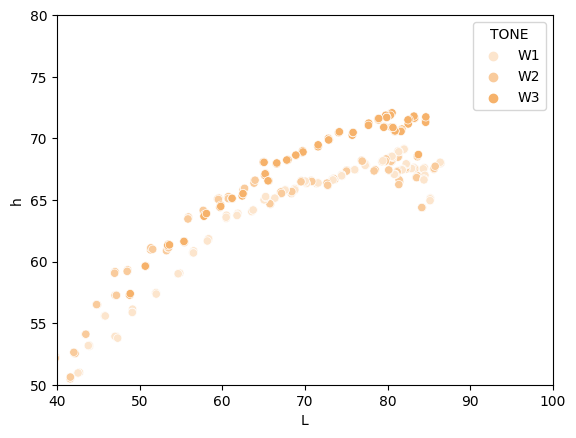

In [10]:
sns.scatterplot(x=h_W['L'], y=h_W['h'], data=h_W, hue='TONE', palette=dict(W3='#f6b26b', W2='#f9cb9c', W1='#fce5cd'))
plt.xlim(40, 100)
plt.ylim(50, 80)

In [21]:
#뉴트럴톤의 h scatter plot 24.08.08

h_N=df[df['Color'].str.contains('N')]
h_N

,Unnamed: 0,#,Brand,Line,Type,Productcode,Color,L*(D65),a*(D65),b*(D65),L,C,h,r,g,b,TONE,LIGHT
9,9,004-1,FA,맞춤형 파운데이션 #1MN,cushion,4,1MN,86.05,6.61,14.55,86.05,15.98,65.57,238.76,210.09,188.15,N,1
10,10,004-2,FA,맞춤형 파운데이션 #1MN,cushion,4,1MN,86.20,6.60,14.48,86.20,15.91,65.50,239.13,210.52,188.69,N,1
11,11,004-3,FA,맞춤형 파운데이션 #1MN,cushion,4,1MN,86.02,6.61,14.55,86.02,15.98,65.57,238.67,210.01,188.06,N,1
30,30,011-1,FA,맞춤형 파운데이션 #3MN,cushion,11,3MN,84.17,8.05,14.10,84.17,16.24,60.28,235.62,203.96,183.91,N,3
31,31,011-2,FA,맞춤형 파운데이션 #3MN,cushion,11,3MN,84.17,8.04,14.09,84.17,16.22,60.29,235.60,203.97,183.92,N,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
619,619,207-2,FA,맞춤형 파운데이션 #39MN,cushion,207,39MN,49.34,16.46,22.53,49.34,27.90,53.85,155.12,106.02,79.94,N,39
620,620,207-3,FA,맞춤형 파운데이션 #39MN,cushion,207,39MN,49.34,16.48,22.55,49.34,27.93,53.84,155.15,106.00,79.90,N,39
639,639,214-1,FA,맞춤형 파운데이션 #40MN,cushion,214,40MN,47.15,16.49,20.69,47.15,26.46,51.45,148.49,100.67,77.89,N,40
640,640,214-2,FA,맞춤형 파운데이션 #40MN,cushion,214,40MN,47.22,16.53,20.65,47.22,26.45,51.32,148.72,100.81,78.12,N,40


(50.0, 80.0)

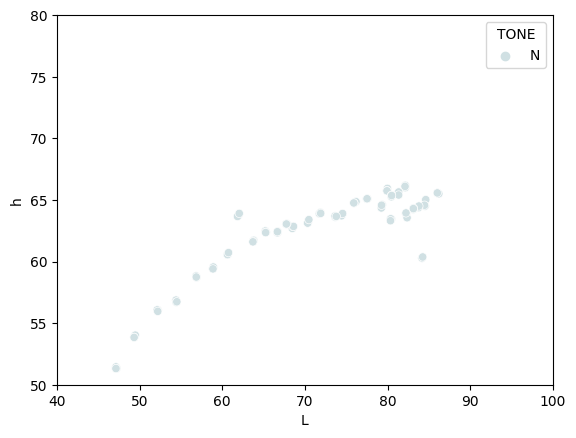

In [23]:
sns.scatterplot(x=h_N['L'], y=h_N['h'], data=h_N, hue='TONE', palette=dict(N='#d0e0e3'))
plt.xlim(40, 100)
plt.ylim(50, 80)

(45.0, 75.0)

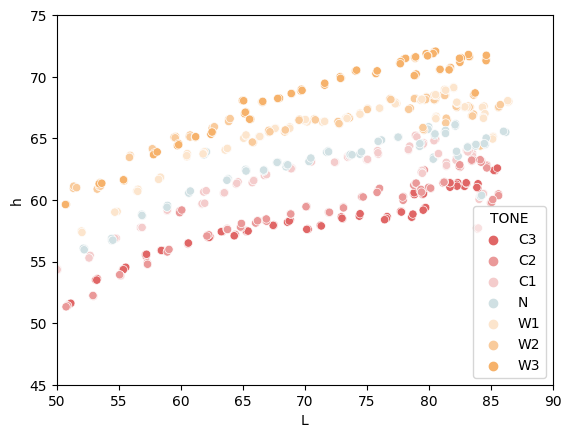

In [9]:
sns.scatterplot(x=df['L'], y=df['h'], data=df, hue='TONE', 
                palette=dict(C3='#e06666', C2='#ea9999', C1='#f4cccc', N='#d0e0e3',W3='#f6b26b', W2='#f9cb9c', W1='#fce5cd'))

plt.xlim(50, 90)
plt.ylim(45, 75)

(2.5, 21.5)

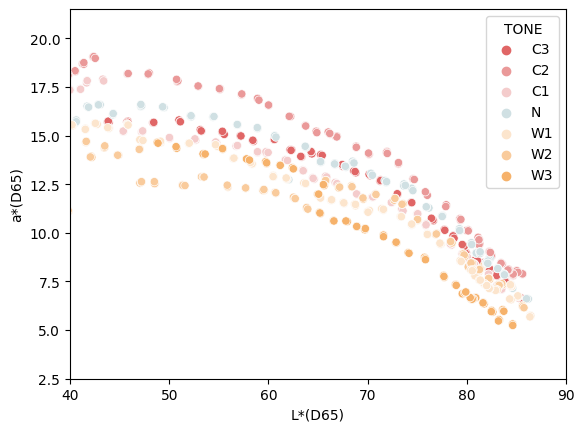

In [11]:
#모든 호수의 a값 분포

sns.scatterplot(x=df['L*(D65)'], y=df['a*(D65)'], data=df, hue='TONE', 
                palette=dict(C3='#e06666', C2='#ea9999', C1='#f4cccc', N='#d0e0e3',W3='#f6b26b', W2='#f9cb9c', W1='#fce5cd'))

plt.xlim(40, 90)
plt.ylim(2.5, 21.5)

(10.0, 35.0)

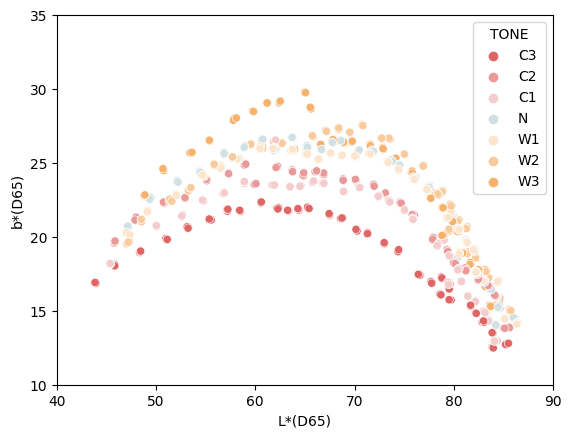

In [38]:
sns.scatterplot(x=df['L*(D65)'], y=df['b*(D65)'], data=df, hue='TONE', 
                palette=dict(C3='#e06666', C2='#ea9999', C1='#f4cccc', N='#d0e0e3',W3='#f6b26b', W2='#f9cb9c', W1='#fce5cd'))

plt.xlim(40, 90)
plt.ylim(10.0, 35)

(45.0, 75.0)

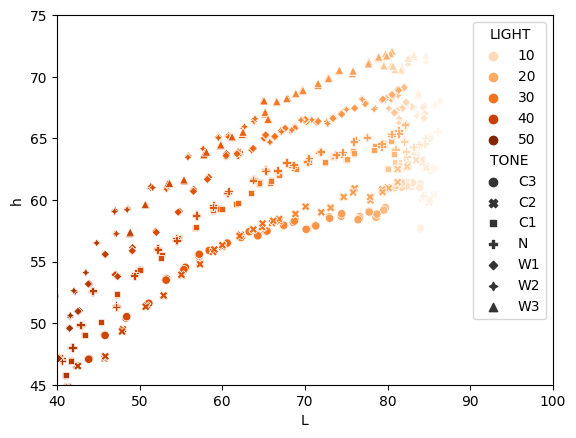

In [5]:
#(실행)24.11.13
#24.08.19 산점도로 홋수, 톤 모두 나타내기
#호수: 마커의 색깔 / 톤: 마커의 모양


sns.scatterplot(x=df['L'], y=df['h'], data=df, hue='LIGHT', style='TONE',
                palette='Oranges', style_order=['C3','C2','C1','N','W1','W2','W3'])

plt.xlim(40, 100)
plt.ylim(45, 75)

2024.11.13 L, h 산점도 그래프

(30.0, 80.0)

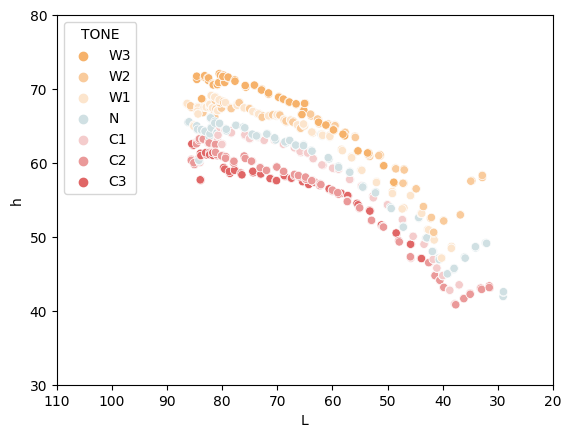

In [18]:
#(실행)24.11.13 파스텔톤
#24.11.13 산점도로 홋수, 톤 모두 나타내기
#호수: 마커의 색깔 / 톤: 마커의 모양


sns.scatterplot(x=df['L'], y=df['h'], data=df, hue='TONE',
                palette=dict(C3='#e06666', C2='#ea9999', C1='#f4cccc', N='#d0e0e3',W3='#f6b26b', W2='#f9cb9c', W1='#fce5cd'), hue_order=['W3','W2','W1','N','C1','C2','C3'])

plt.xlim(110, 20)
plt.ylim(30, 80)

2024.11.14 L, C 산점도 그래프

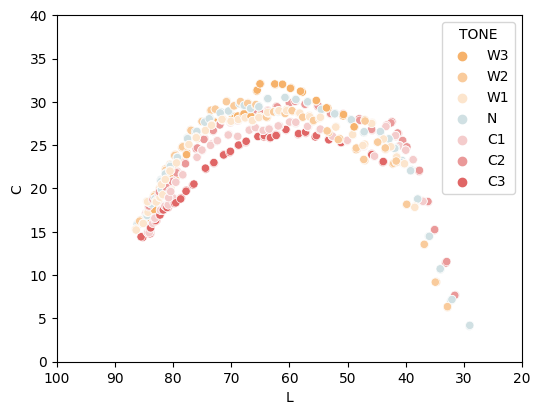

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

# Jupyter Notebook에서 matplotlib 그래프를 인라인으로 보여주기 위한 설정
%matplotlib inline

plt.figure(figsize=(6,4.5))

sns.scatterplot(x=df['L'], y=df['C'], data=df, hue='TONE',
                palette=dict(C3='#e06666', C2='#ea9999', C1='#f4cccc', N='#d0e0e3',W3='#f6b26b', W2='#f9cb9c', W1='#fce5cd'), hue_order=['W3','W2','W1','N','C1','C2','C3'])


plt.xlim(100, 20)
plt.ylim(0, 40)
plt.show()

In [29]:
#24.08.23 산점도로 홋수, 톤 모두 나타내고 추세선(Regression line)을 톤별로 나타내기(총 7개 톤, 7개의 추세선)
#호수: 마커의 색깔 / 톤: 마커의 모양

(45.0, 75.0)

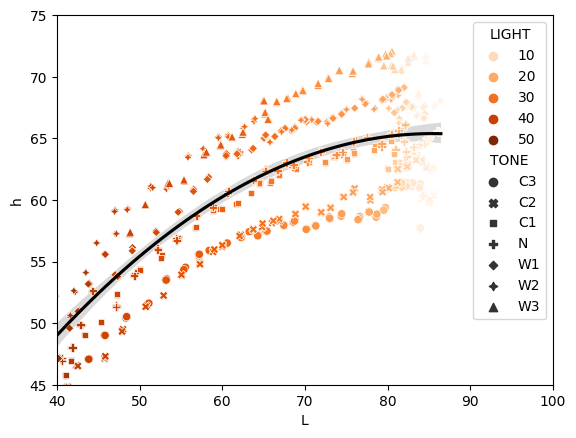

In [13]:
#24.08.23 전체 샘플에 대한 regression line & scatter plot

sns.regplot(data=df, x=df['L'], y=df['h'], scatter=False, order=2, line_kws={"color":"black"}, ci=99)
sns.scatterplot(x=df['L'], y=df['h'], data=df, hue='LIGHT', style='TONE',
                palette='Oranges', style_order=['C3','C2','C1','N','W1','W2','W3'])

plt.xlim(40, 100)
plt.ylim(45, 75)

[-6.73822119e-03  1.16563704e+00  9.97848025e+00]


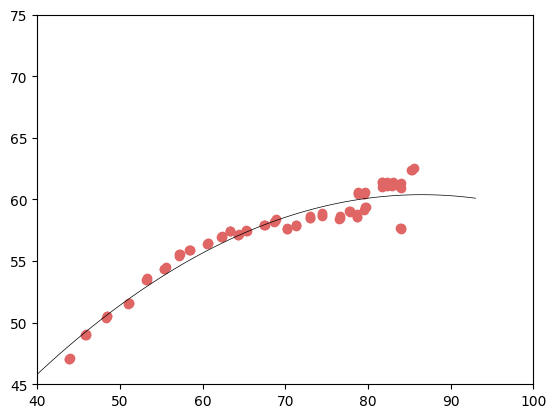

In [6]:
#24.08.23 C3에 대한 regression line & scatter plot

C3=df[df['TONE'].str.contains('C3')]

fit_line = np.polyfit(C3['L'], C3['h'], 2)
print(fit_line)

# [-6.73822119e-03  1.16563704e+00  9.97848025e+00]
# y=-6.73822119e-03x^2+1.16563704e+00x^1+9.97848025e+00

#2차 이상의 회귀선 식에서는 np. linspace 함수로 촘촘한 x값을 새롭게 선언한 뒤 회귀식을 구해야 완만한 곡선의 회귀식을 그릴 수 있음
x_line = np.linspace(1, 93, 100)
y_pred = x_line**2*fit_line[0]+x_line**1*fit_line[1]+fit_line[2]

plt.plot(x_line, y_pred, color = 'black', lw=0.5)
plt.scatter(C3['L'], C3['h'], color = '#e06666')

plt.xlim(40, 100)
plt.ylim(45, 75)

plt.show()


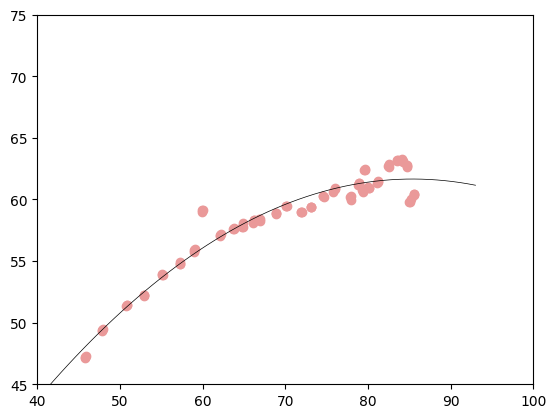

In [10]:
#24.08.23 C3에 대한 regression line & scatter plot

C2=df[df['TONE'].str.contains('C2')]

fit_line2 = np.polyfit(C2['L'], C2['h'], 2)

#2차 이상의 회귀선 식에서는 np. linspace 함수로 촘촘한 x값을 새롭게 선언한 뒤 회귀식을 구해야 완만한 곡선의 회귀식을 그릴 수 있음
x_line2 = np.linspace(1, 93, 100)
y_pred2 = x_line2**2*fit_line2[0]+x_line2**1*fit_line2[1]+fit_line2[2]

plt.plot(x_line2, y_pred2, color = 'black', lw=0.5)
plt.scatter(C2['L'], C2['h'], color = '#ea9999')

plt.xlim(40, 100)
plt.ylim(45, 75)

plt.show()


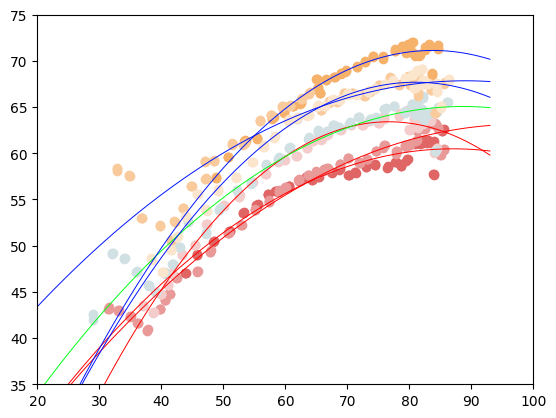

In [17]:
#24.08.23 모든 홋수에 대한 추세선

W1=df[df['TONE'].str.contains('W1')]
W2=df[df['TONE'].str.contains('W2')]
W3=df[df['TONE'].str.contains('W3')]

N=df[df['TONE'].str.contains('N')]

C1=df[df['TONE'].str.contains('C1')]
C2=df[df['TONE'].str.contains('C2')]
C3=df[df['TONE'].str.contains('C3')]

fit_line_w1 = np.polyfit(W1['L'], W1['h'], 2)
fit_line_w2 = np.polyfit(W2['L'], W2['h'], 2)
fit_line_w3 = np.polyfit(W3['L'], W3['h'], 2)
fit_line_n = np.polyfit(N['L'], N['h'], 2)
fit_line_c1 = np.polyfit(C1['L'], C1['h'], 2)
fit_line_c2 = np.polyfit(C2['L'], C2['h'], 2)
fit_line_c3 = np.polyfit(C3['L'], C3['h'], 2)

x_line = np.linspace(1, 93, 100)

x_line_c3 = np.linspace(1, 93, 100)
y_pred_c3 = x_line_c3**2*fit_line_c3[0]+x_line_c3**1*fit_line_c3[1]+fit_line_c3[2]
x_line_c2 = np.linspace(1, 93, 100)
y_pred_c2 = x_line_c2**2*fit_line_c2[0]+x_line_c2**1*fit_line_c2[1]+fit_line_c2[2]
x_line_c1 = np.linspace(1, 93, 100)
y_pred_c1 = x_line_c1**2*fit_line_c1[0]+x_line_c1**1*fit_line_c1[1]+fit_line_c1[2]

x_line_n = np.linspace(1, 93, 100)
y_pred_n = x_line_n**2*fit_line_n[0]+x_line_n**1*fit_line_n[1]+fit_line_n[2]

x_line_w3 = np.linspace(1, 93, 100)
y_pred_w3 = x_line_w3**2*fit_line_w3[0]+x_line_w3**1*fit_line_w3[1]+fit_line_w3[2]
x_line_w2 = np.linspace(1, 93, 100)
y_pred_w2 = x_line_w2**2*fit_line_w2[0]+x_line_w2**1*fit_line_w2[1]+fit_line_w2[2]
x_line_w1 = np.linspace(1, 93, 100)
y_pred_w1 = x_line_w1**2*fit_line_w1[0]+x_line_w1**1*fit_line_w1[1]+fit_line_w1[2]


plt.plot(x_line_c3, y_pred_c3, color = '#ff0000', lw=0.7)
plt.scatter(C3['L'], C3['h'], color = '#e06666')
plt.plot(x_line_c2, y_pred_c2, color = '#ff0000', lw=0.7)
plt.scatter(C2['L'], C2['h'], color = '#ea9999')
plt.plot(x_line_c1, y_pred_c1, color = '#ff0000', lw=0.7)
plt.scatter(C1['L'], C1['h'], color = '#f4cccc')

plt.plot(x_line_n, y_pred_n, color = '#00ff17', lw=0.7)
plt.scatter(N['L'], N['h'], color = '#d0e0e3')

plt.plot(x_line_w3, y_pred_w3, color = '#0013ff', lw=0.7)
plt.scatter(W3['L'], W3['h'], color = '#f6b26b')
plt.plot(x_line_w2, y_pred_w2, color = '#0013ff', lw=0.7)
plt.scatter(W2['L'], W2['h'], color = '#f9cb9c')
plt.plot(x_line_w1, y_pred_w1, color = '#0013ff', lw=0.7)
plt.scatter(W1['L'], W1['h'], color = '#fce5cd')

plt.xlim(20, 100)
plt.ylim(35, 75)

plt.show()

In [8]:
df_notf=df[651:771]

In [9]:
df_notf

,Unnamed: 0,#,Brand,Line,Type,Productcode,Color,L*(D65),a*(D65),b*(D65),L,C,h,r,g,b,TONE,LIGHT
651,651,218-1,FA팀,맞춤형 파운데이션 #41MC2,cushion,218,41MC2,42.32,19.05,20.12,42.32,27.71,46.56,138.62,87.12,67.71,C2,41
652,652,218-2,FA팀,맞춤형 파운데이션 #41MC2,cushion,218,41MC2,42.40,19.06,20.11,42.40,27.71,46.54,138.85,87.31,67.91,C2,41
653,653,218-3,FA팀,맞춤형 파운데이션 #41MC2,cushion,218,41MC2,42.54,18.97,20.00,42.54,27.57,46.51,139.07,87.72,68.41,C2,41
654,654,219-1,FA팀,맞춤형 파운데이션 #41MC1,cushion,219,41MC1,43.38,17.84,20.56,43.38,27.22,49.05,140.02,90.52,69.36,C1,41
655,655,219-2,FA팀,맞춤형 파운데이션 #41MC1,cushion,219,41MC1,43.30,17.90,20.65,43.30,27.33,49.08,139.91,90.28,69.03,C1,41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
766,766,256-2,FA팀,맞춤형 파운데이션 #49MW2,cushion,256,49MW2,32.80,3.32,5.32,32.80,6.27,58.03,85.83,75.10,68.93,W2,49
767,767,256-3,FA팀,맞춤형 파운데이션 #49MW2,cushion,256,49MW2,32.81,3.34,5.41,32.81,6.36,58.31,85.93,75.11,68.82,W2,49
768,768,257-1,FA팀,맞춤형 파운데이션 #50MN,cushion,257,50MN,29.03,3.05,2.74,29.03,4.10,41.94,75.00,66.71,64.32,N,50
769,769,257-2,FA팀,맞춤형 파운데이션 #50MN,cushion,257,50MN,28.97,3.10,2.84,28.97,4.20,42.49,75.00,66.54,64.03,N,50


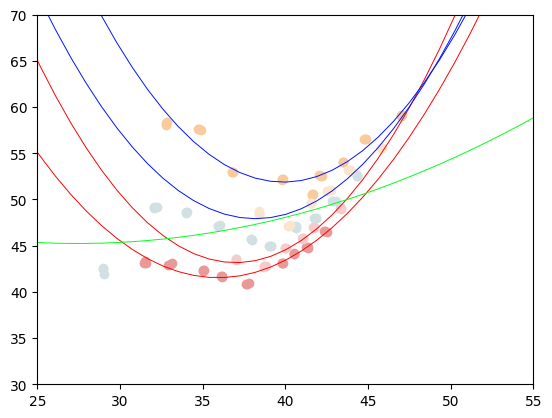

In [14]:
#24.09.23 비기능성 홋수에 대한 추세선

W1=df_notf[df_notf['TONE'].str.contains('W1')]
W2=df_notf[df_notf['TONE'].str.contains('W2')]

N=df_notf[df_notf['TONE'].str.contains('N')]

C1=df_notf[df_notf['TONE'].str.contains('C1')]
C2=df_notf[df_notf['TONE'].str.contains('C2')]

fit_line_w1 = np.polyfit(W1['L'], W1['h'], 2)
fit_line_w2 = np.polyfit(W2['L'], W2['h'], 2)
fit_line_n = np.polyfit(N['L'], N['h'], 2)
fit_line_c1 = np.polyfit(C1['L'], C1['h'], 2)
fit_line_c2 = np.polyfit(C2['L'], C2['h'], 2)

x_line = np.linspace(1, 93, 100)

x_line_c2 = np.linspace(1, 93, 100)
y_pred_c2 = x_line_c2**2*fit_line_c2[0]+x_line_c2**1*fit_line_c2[1]+fit_line_c2[2]
x_line_c1 = np.linspace(1, 93, 100)
y_pred_c1 = x_line_c1**2*fit_line_c1[0]+x_line_c1**1*fit_line_c1[1]+fit_line_c1[2]

x_line_n = np.linspace(1, 93, 100)
y_pred_n = x_line_n**2*fit_line_n[0]+x_line_n**1*fit_line_n[1]+fit_line_n[2]

x_line_w2 = np.linspace(1, 93, 100)
y_pred_w2 = x_line_w2**2*fit_line_w2[0]+x_line_w2**1*fit_line_w2[1]+fit_line_w2[2]
x_line_w1 = np.linspace(1, 93, 100)
y_pred_w1 = x_line_w1**2*fit_line_w1[0]+x_line_w1**1*fit_line_w1[1]+fit_line_w1[2]


plt.plot(x_line_c2, y_pred_c2, color = '#ff0000', lw=0.7)
plt.scatter(C2['L'], C2['h'], color = '#ea9999')
plt.plot(x_line_c1, y_pred_c1, color = '#ff0000', lw=0.7)
plt.scatter(C1['L'], C1['h'], color = '#f4cccc')

plt.plot(x_line_n, y_pred_n, color = '#00ff17', lw=0.7)
plt.scatter(N['L'], N['h'], color = '#d0e0e3')

plt.plot(x_line_w2, y_pred_w2, color = '#0013ff', lw=0.7)
plt.scatter(W2['L'], W2['h'], color = '#f9cb9c')
plt.plot(x_line_w1, y_pred_w1, color = '#0013ff', lw=0.7)
plt.scatter(W1['L'], W1['h'], color = '#fce5cd')

plt.xlim(25, 55)
plt.ylim(30, 70)

plt.show()

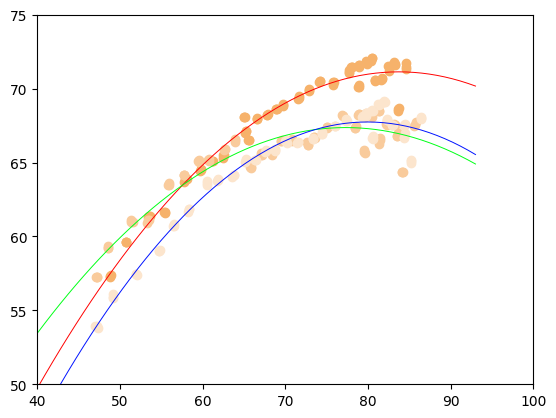

In [84]:
#24.08.23 웜톤 추세선

W1=df[df['TONE'].str.contains('W1')]
W2=df[df['TONE'].str.contains('W2')]
W3=df[df['TONE'].str.contains('W3')]

fit_line_w1 = np.polyfit(W1['L'], W1['h'], 2)
fit_line_w2 = np.polyfit(W2['L'], W2['h'], 2)
fit_line_w3 = np.polyfit(W3['L'], W3['h'], 2)

x_line_w3 = np.linspace(1, 93, 100)
y_pred_w3 = x_line**2*fit_line_w3[0]+x_line**1*fit_line_w3[1]+fit_line_w3[2]
x_line_w2 = np.linspace(1, 93, 100)
y_pred_w2 = x_line**2*fit_line_w2[0]+x_line**1*fit_line_w2[1]+fit_line_w2[2]
x_line_w1 = np.linspace(1, 93, 100)
y_pred_w1 = x_line**2*fit_line_w1[0]+x_line**1*fit_line_w1[1]+fit_line_w1[2]

plt.plot(x_line_w3, y_pred_w3, color = '#ff0000', lw=0.7)
plt.scatter(W3['L'], W3['h'], color = '#f6b26b')
plt.plot(x_line_w2, y_pred_w2, color = '#00ff17', lw=0.7)
plt.scatter(W2['L'], W2['h'], color = '#f9cb9c')
plt.plot(x_line_w1, y_pred_w1, color = '#0013ff', lw=0.7)
plt.scatter(W1['L'], W1['h'], color = '#fce5cd')

plt.xlim(40, 100)
plt.ylim(50, 75)

plt.show()

In [85]:
fit_line_w1 = np.polyfit(W1['L'], W1['h'], 2)
fit_line_w2 = np.polyfit(W2['L'], W2['h'], 2)
fit_line_w3 = np.polyfit(W3['L'], W3['h'], 2)
print(fit_line_w1)
print(fit_line_w2)
print(fit_line_w3)

[-1.28717220e-02  2.05737868e+00 -1.44689706e+01]
[-0.0099959   1.54530455  7.64041284]
[-0.01118748  1.87347293 -7.30062425]


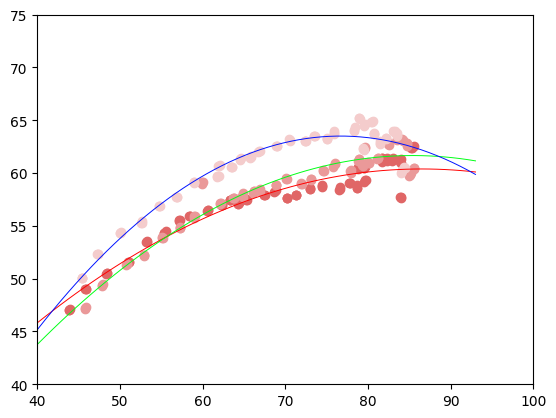

In [13]:
#24.08.27 쿨톤 추세선

C1=df[df['TONE'].str.contains('C1')]
C2=df[df['TONE'].str.contains('C2')]
C3=df[df['TONE'].str.contains('C3')]

fit_line_C1 = np.polyfit(C1['L'], C1['h'], 2)
fit_line_C2 = np.polyfit(C2['L'], C2['h'], 2)
fit_line_C3 = np.polyfit(C3['L'], C3['h'], 2)

x_line_C3 = np.linspace(1, 93, 100)
y_pred_C3 = x_line**2*fit_line_C3[0]+x_line**1*fit_line_C3[1]+fit_line_C3[2]
x_line_C2 = np.linspace(1, 93, 100)
y_pred_C2 = x_line**2*fit_line_C2[0]+x_line**1*fit_line_C2[1]+fit_line_C2[2]
x_line_C1 = np.linspace(1, 93, 100)
y_pred_C1 = x_line**2*fit_line_C1[0]+x_line**1*fit_line_C1[1]+fit_line_C1[2]

plt.plot(x_line_C3, y_pred_C3, color = '#ff0000', lw=0.7)
plt.scatter(C3['L'], C3['h'], color = '#e06666')
plt.plot(x_line_C2, y_pred_C2, color = '#00ff17', lw=0.7)
plt.scatter(C2['L'], C2['h'], color = '#ea9999')
plt.plot(x_line_C1, y_pred_C1, color = '#0013ff', lw=0.7)
plt.scatter(C1['L'], C1['h'], color = '#f4cccc')

plt.xlim(40, 100)
plt.ylim(40, 75)

plt.show()

In [14]:
#24.08.27 추세선 방정식

fit_line_C1 = np.polyfit(C1['L'], C1['h'], 2)
fit_line_C2 = np.polyfit(C2['L'], C2['h'], 2)
fit_line_C3 = np.polyfit(C3['L'], C3['h'], 2)

print(fit_line_C1)
print(fit_line_C2)
print(fit_line_C3)

[-1.36286017e-02  2.08990722e+00 -1.66150929e+01]
[-0.00868317  1.48281986 -1.64501888]
[-6.73822119e-03  1.16563704e+00  9.97848025e+00]


(-40.0, 90.0)

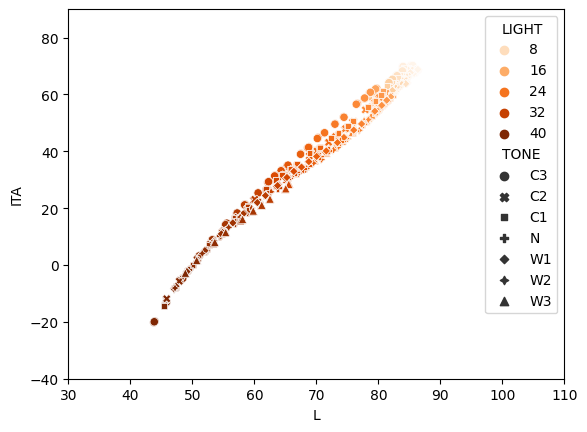

In [15]:
#2024.08.28 조색샘플의 ITA VALUE

sns.scatterplot(x=df['L'], y=df['ITA'], data=df, hue='LIGHT', style='TONE',
                palette='Oranges', style_order=['C3','C2','C1','N','W1','W2','W3'])

plt.xlim(30, 110)
plt.ylim(-40, 90)

In [18]:
df_f=df[0:651]

In [20]:
df_f

,Unnamed: 0,#,Brand,Line,Type,Productcode,Color,L*(D65),a*(D65),b*(D65),L,C,h,r,g,b,TONE,LIGHT
0,0,001-1,FA팀,맞춤형 파운데이션 #1MC3,cushion,1,1MC3,85.32,6.69,12.78,85.32,14.43,62.37,235.63,208.12,189.47,C3,1
1,1,001-2,FA팀,맞춤형 파운데이션 #1MC3,cushion,1,1MC3,85.24,6.65,12.72,85.24,14.35,62.40,235.29,207.92,189.36,C3,1
2,2,001-3,FA팀,맞춤형 파운데이션 #1MC3,cushion,1,1MC3,85.52,6.64,12.80,85.52,14.42,62.58,236.13,208.71,189.98,C3,1
3,3,002-1,FA팀,맞춤형 파운데이션 #1MC2,cushion,2,1MC2,85.58,7.89,13.91,85.58,15.99,60.44,239.28,208.00,188.11,C2,1
4,4,002-2,FA팀,맞춤형 파운데이션 #1MC2,cushion,2,1MC2,85.61,7.87,13.90,85.61,15.97,60.48,239.33,208.10,188.21,C2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
646,646,216-2,FA팀,맞춤형 파운데이션 #40MW2,cushion,216,40MW2,47.19,12.60,19.61,47.19,23.31,57.28,142.68,103.39,79.61,W2,40
647,647,216-3,FA팀,맞춤형 파운데이션 #40MW2,cushion,216,40MW2,47.20,12.63,19.64,47.20,23.35,57.26,142.77,103.40,79.58,W2,40
648,648,217-1,FA팀,맞춤형 파운데이션 #40MW3,cushion,217,40MW3,48.84,14.63,22.79,48.84,27.08,57.30,151.25,106.00,78.20,W3,40
649,649,217-2,FA팀,맞춤형 파운데이션 #40MW3,cushion,217,40MW3,48.79,14.65,22.80,48.79,27.10,57.28,151.14,105.86,78.07,W3,40


(20.0, 100.0)

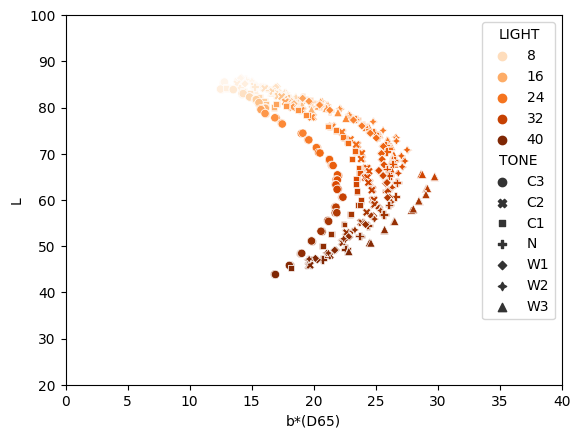

In [22]:
#2024.09.24 기능성 1~40호 측색 데이터 ITA graph
sns.scatterplot(x=df_f['b*(D65)'], y=df_f['L'], data=df_f, hue='LIGHT', style='TONE',
                palette='Oranges', style_order=['C3','C2','C1','N','W1','W2','W3'])

plt.xlim(00, 40)
plt.ylim(20, 100)

In [17]:
df['b*(D65)'].min

<bound method NDFrame._add_numeric_operations.<locals>.min of 0     12.78
1     12.72
2     12.80
3     13.91
4     13.90
       ... 
646   19.61
647   19.64
648   22.79
649   22.80
650   22.84
Name: b*(D65), Length: 651, dtype: float64>

In [19]:
df['L'].min

<bound method NDFrame._add_numeric_operations.<locals>.min of 0     85.32
1     85.24
2     85.52
3     85.58
4     85.61
       ... 
646   47.19
647   47.20
648   48.84
649   48.79
650   48.87
Name: L, Length: 651, dtype: float64>

💚 ITA값 계산_2024.11.01



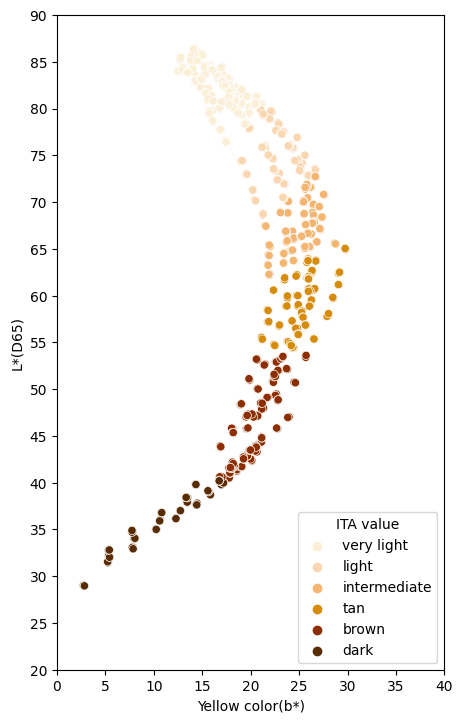

In [14]:
# 'ITA' 값 기준으로 분류 및 색상 지정 (그래프 공유: 2024.11.01 am 11:30)
ita_labels = ['dark', 'brown', 'tan', 'intermediate', 'light', 'very light']
ita_labels_reversed = ita_labels[::-1]
ita_bins = [-np.inf, -30, 10, 28, 41, 55, np.inf]
ita_colors = ['#592B00', '#8D2E00', '#D68C0A', '#F3B570', '#FAD7B1', '#FBF0D7']

# 'ita' 값을 기준으로 카테고리 열 생성
df['ita_category'] = pd.cut(df['ITA'], bins=ita_bins, labels=ita_labels, include_lowest=True)

# 카테고리에 따른 색상 사전 만들기
color_dict = dict(zip(ita_labels, ita_colors))

# 그래프 크기 조절
plt.figure(figsize=(5, 8.5))

# 산점도 그리기
scatter = sns.scatterplot(x='b*(D65)', y='L*(D65)', data=df, hue='ita_category',
                          palette=color_dict,hue_order=ita_labels_reversed,
                          legend="full")

# x축, y축 간격 및 범위 설정
plt.xticks(np.arange(0, 41, 5))
plt.yticks(np.arange(20, 91, 5))
plt.xlim(0, 40)
plt.ylim(20, 90)

# x축 타이틀 추가
plt.xlabel("Yellow color(b*)")

plt.legend(title='ITA value', loc='lower right')
plt.savefig('sample_graph.png', format='png')



In [13]:
plt.savefig('sample_graph.png', format='png')

<Figure size 640x480 with 0 Axes>

(20.0, 100.0)

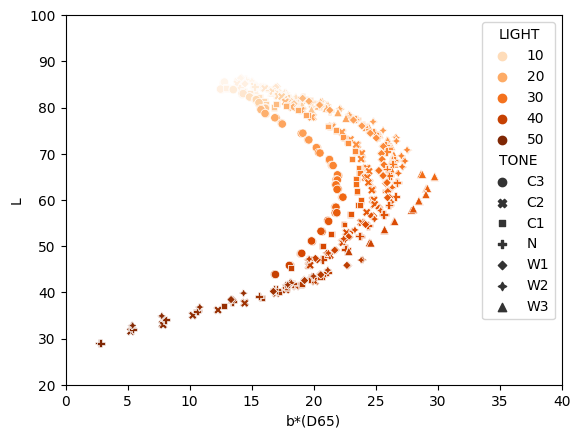

In [10]:
sns.scatterplot(x=df['b*(D65)'], y=df['L'], data=df, hue='LIGHT', style='TONE',
                palette='Oranges', style_order=['C3','C2','C1','N','W1','W2','W3'])

plt.xlim(00, 40)
plt.ylim(20, 100)

(20.0, 100.0)

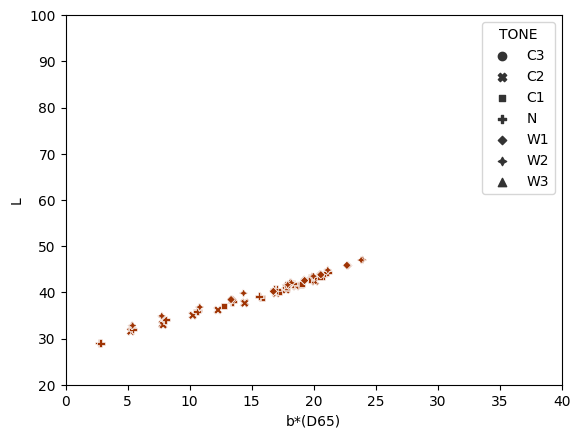

In [49]:
#2024.09.23 비기능성 41~50호 측색 데이터 ITA graph
sns.scatterplot(x=df_notf['b*(D65)'], y=df_notf['L'], data=df_notf, style='TONE',
                color='#9F3404', style_order=['C3','C2','C1','N','W1','W2','W3'])

plt.xlim(00, 40)
plt.ylim(20, 100)

(20.0, 100.0)

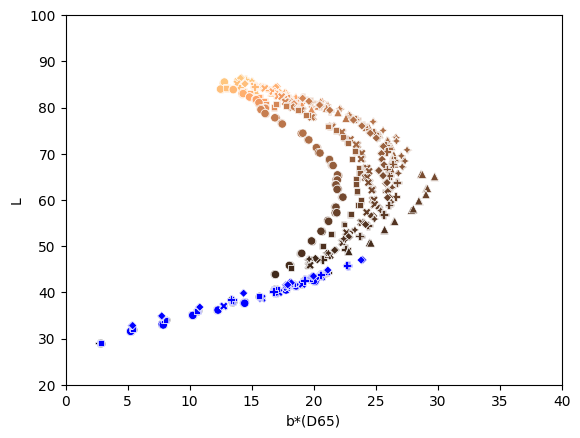

In [42]:
#2024.09.23 비기능성 41~50호 측색 데이터 ITA graph

highlight = df[651:771]

sns.scatterplot(x=df['b*(D65)'], y=df['L'], data=df, hue='LIGHT', style='TONE', style_order=['C3','C2','C1','N','W1','W2','W3'], palette='copper_r', legend=False)

sns.scatterplot(x=df['b*(D65)'], y=df['L'], data=highlight, style='TONE', color='blue', style_order=['C2','C1','N','W1','W2'],legend=False)


plt.xlim(00, 40)
plt.ylim(20, 100)

C:\Users\ysoh\AppData\Local\Temp\ipykernel_16472\2004545223.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=df['b*(D65)'], y=df['L'], data=df, style='TONE', color='#f6af2b', style_order=['C3','C2','C1','N','W1','W2','W3'], palette='copper_r', legend=False)


(20.0, 100.0)

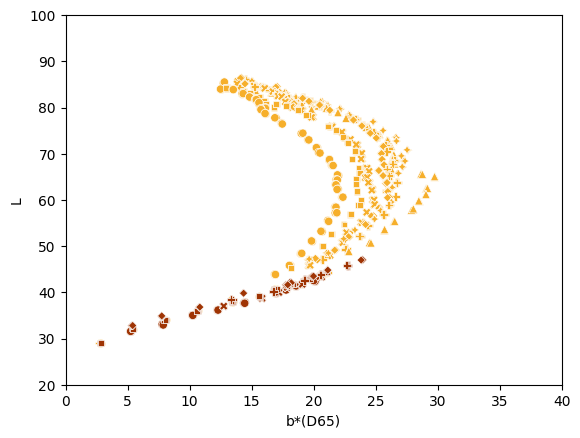

In [46]:
#2024.09.23 비기능성 41~50호 측색 데이터 ITA graph

highlight = df[651:771]

sns.scatterplot(x=df['b*(D65)'], y=df['L'], data=df, style='TONE', color='#f6af2b', style_order=['C3','C2','C1','N','W1','W2','W3'], palette='copper_r', legend=False)

sns.scatterplot(x=df['b*(D65)'], y=df['L'], data=highlight, style='TONE', color='#9F3404', style_order=['C2','C1','N','W1','W2'],legend=False)


plt.xlim(00, 40)
plt.ylim(20, 100)


✅ MONK SKIN TONE 분포 파악용 히스토그램(2024.11.01 PM 14:39 공유)

In [39]:
df = pd.read_csv('./241101_맞춤형파운데이션(MST2)_분석용.csv', encoding='cp949')
df

,Unnamed: 0,#,Brand,Line,L*(D65),a*(D65),b*(D65),Unnamed: 7
0,0,001-1,FA팀,맞춤형 파운데이션 #1MC3,85.32,6.69,12.78,MST05
1,1,001-2,FA팀,맞춤형 파운데이션 #1MC3,85.24,6.65,12.72,MST05
2,2,001-3,FA팀,맞춤형 파운데이션 #1MC3,85.52,6.64,12.80,MST05
3,3,002-1,FA팀,맞춤형 파운데이션 #1MC2,85.58,7.89,13.91,MST05
4,4,002-2,FA팀,맞춤형 파운데이션 #1MC2,85.61,7.87,13.90,MST05
...,...,...,...,...,...,...,...,...
766,766,256-2,FA팀,맞춤형 파운데이션 #49MW2,32.80,3.32,5.32,MST08
767,767,256-3,FA팀,맞춤형 파운데이션 #49MW2,32.81,3.34,5.41,MST08
768,768,257-1,FA팀,맞춤형 파운데이션 #50MN,29.03,3.05,2.74,MST09
769,769,257-2,FA팀,맞춤형 파운데이션 #50MN,28.97,3.10,2.84,MST09


In [41]:
mst=df['Unnamed: 7'].value_counts()

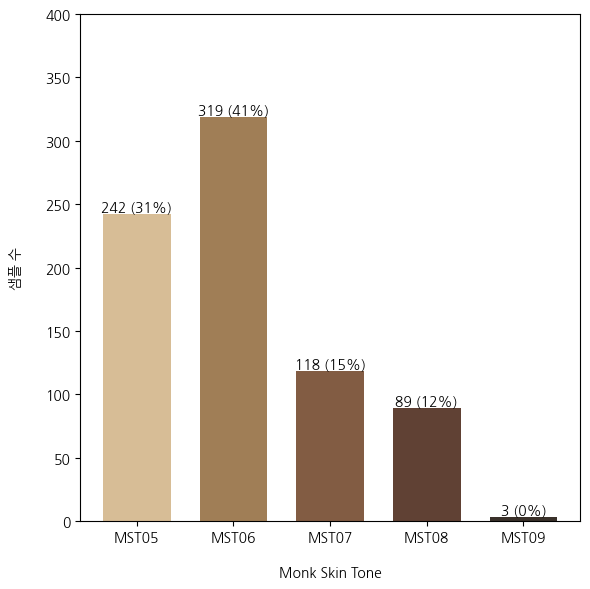

In [55]:

# 한글 폰트 설정 (자신의 시스템에 적합한 폰트로 설정)
plt.rc('font', family='NanumGothic')  # 올바른 폰트 이름을 사용하십시오.

# 마이너스 부호 설정
plt.rcParams['axes.unicode_minus'] = False

# 인덱스 기준으로 오름차순 정렬
rank_sorted = mst.sort_index()

# 막대 색상을 정의합니다.
colors = {
    'MST05': '#d7bd96',
    'MST06': '#a07e56',
    'MST07': '#825c43',
    'MST08': '#604134',
    'MST09': '#3a312a'
}

# 히스토그램 그리기
plt.figure(figsize=(6, 6))
bars = plt.bar(rank_sorted.index, rank_sorted.values, width=0.7, color=[colors.get(x, '#1f77b4') for x in rank_sorted.index])

# y축 최대값 설정
plt.ylim(0, 400)

# 샘플 개수와 비율을 막대 위에 표시
total = mst.sum()
for bar in bars:
    count = bar.get_height()
    percentage = (count / total) * 100
    plt.text(bar.get_x() + bar.get_width() / 2, count, f'{count} ({percentage:.0f}%)', ha='center', va='bottom')
    
plt.xlabel('Monk Skin Tone', labelpad=16)
plt.ylabel('샘플 수', labelpad=16)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()